In [13]:
library(randomForest)
library(caret)
library(ggplot2)
library(Metrics)

In [14]:
df <- read.csv("../../../Cleaned Datasets/prices_cleaned.csv")

set.seed(42)

train_index <- createDataPartition(df$Price, p = 0.8, list = FALSE)

train_data <- df[train_index, ]
test_data <- df[-train_index, ]

In [15]:
set.seed(42)

num_predictors <- length(names(train_data)) - 1
mtry_sqrt <- floor(sqrt(num_predictors))

model <- randomForest(Price ~ ., data = train_data, ntree = 150, 
            mtry = mtry_sqrt, nodesize=1, maxnodes=20, do.trace=TRUE)

print(model)
summary(model)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
   1 |   0.6184    61.87 |
   2 |    0.577    57.74 |
   3 |    0.576    57.64 |
   4 |    0.542    54.23 |
   5 |   0.5025    50.28 |
   6 |    0.501    50.13 |
   7 |   0.4868    48.71 |
   8 |   0.4937    49.40 |
   9 |   0.4935    49.38 |
  10 |   0.4928    49.31 |
  11 |   0.4889    48.92 |
  12 |   0.4785    47.88 |
  13 |   0.4694    46.97 |
  14 |   0.4612    46.15 |
  15 |   0.4608    46.10 |
  16 |   0.4585    45.88 |
  17 |   0.4642    46.44 |
  18 |   0.4625    46.28 |
  19 |   0.4594    45.96 |
  20 |   0.4558    45.61 |
  21 |    0.453    45.33 |
  22 |   0.4479    44.81 |
  23 |   0.4496    44.99 |
  24 |   0.4456    44.59 |
  25 |   0.4452    44.55 |
  26 |   0.4468    44.71 |
  27 |   0.4447    44.50 |
  28 |   0.4459    44.61 |
  29 |   0.4459    44.61 |
  30 |    0.443    44.32 |
  31 |   0.4434    44.37 |
  32 |   0.4423    44.26 |
  33 |   0.4436    44.39 |
  34 |   0.4416    44.18 |
  35 |   0.4381    43.84 |
 

                Length Class  Mode     
call               8   -none- call     
type               1   -none- character
predicted       9449   -none- numeric  
mse              300   -none- numeric  
rsq              300   -none- numeric  
oob.times       9449   -none- numeric  
importance        15   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               9449   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [16]:
predictions <- predict(model, test_data)
actual <- test_data$Price

In [17]:
mae_value <- mae(actual, predictions)
print(paste("Mean Absolute Error:", mae_value))

mse_value <- mse(actual, predictions)
print(paste("Mean Squared Error:", mse_value))

rmse_value <- rmse(actual, predictions)
print(paste("Root Mean Squared Error:", rmse_value))

r_squared_value <- summary(lm(predictions ~ actual))$r.squared
print(paste("R-squared score:", r_squared_value))

[1] "Mean Absolute Error: 0.508429338247006"
[1] "Mean Squared Error: 0.433216132897957"
[1] "Root Mean Squared Error: 0.658191562463359"
[1] "R-squared score: 0.62350170417708"


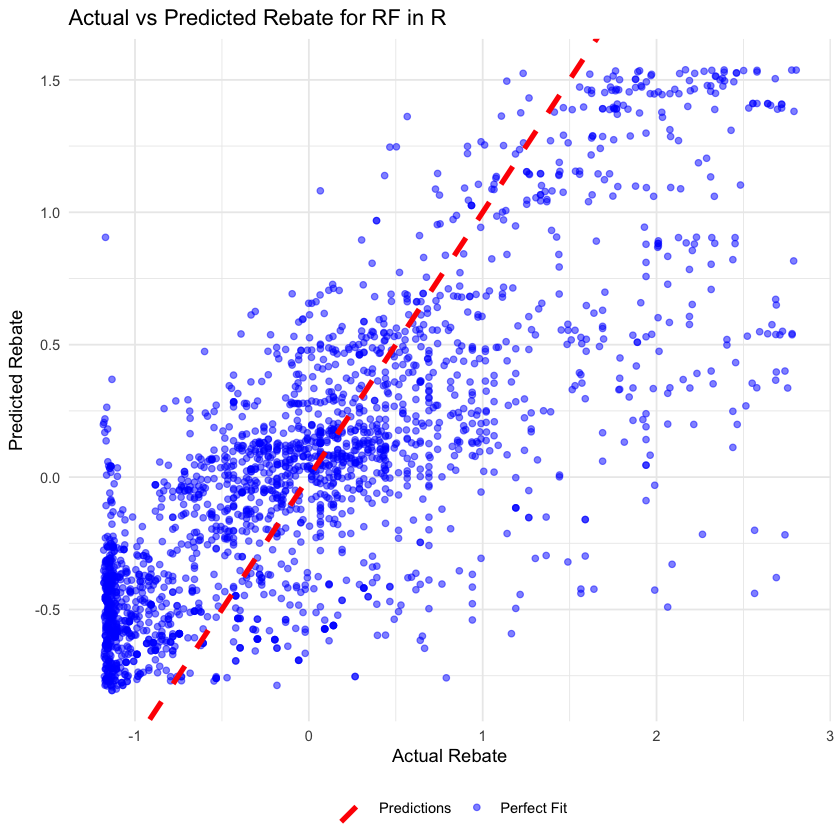

In [18]:
data_plot <- data.frame(
  Actual = actual,
  Predicted = predictions
)

p <- ggplot(data_plot, aes(x = Actual, y = Predicted)) +
  geom_point(aes(color = "Predictions"), alpha = 0.5) + 
  geom_abline(aes(color = "Perfect Fit", intercept = 0, slope = 1), linetype = "dashed", linewidth = 1.5) +
  scale_color_manual(values = c("Predictions" = "blue", "Perfect Fit" = "red"), name = "", labels = c("Predictions", "Perfect Fit")) +
  labs(title = "Actual vs Predicted Rebate for RF in R", 
       x = "Actual Rebate", 
       y = "Predicted Rebate") +
  theme_minimal() +
  theme(legend.position = "bottom")

print(p)